# Titanic Dataset

<b> Dataset variables Description:</b>

- Pclass Passenger Class : (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival Survival:  (0 = No; 1 = Yes)
- name: Name of the passenger
- sex: Gender of the passengers
- age: Age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare (British pound)
- cabin: Cabin
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

What Data Will I Use in This Competition?
- In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

- Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

- The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

- Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

- Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

  <b> 1.Import all the libraries</b>

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter


<b> 2. Inspect the dataset </b>

In [71]:
#read the train dataset
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
# A small glance in the dataset reveals that the target variable to be targeted is the column 'Survived'.

In [73]:
#inspecting thr train dataset
sf= pd.read_csv('test.csv.xls')
sf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [74]:
#dropping the passengerId column as it has a random continous variable given to the passengers on board.
df.drop('PassengerId' , axis=1 , inplace=True)

In [75]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b> 2.1 Dimensions of the train dataset</b>

In [76]:
#shape of the train dataset :(rows,columns)
df.shape

(891, 11)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


*<span style='background :yellow' >Insights-
- age is stored as float : so we can change it to int and we can create groups to visualize them
- the ticket column can be dropped. </span>

In [78]:
df.drop(['Ticket'], axis=1 , inplace=True)

In [79]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [80]:
#check the null values in each columns.
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<b><span style='background :yellow' > Insight on the dataset: </span></b> 
the age , cabin, and embarked column has null values.

In [81]:
#calculating the percentage of the null values.
df.isnull().sum() / len(df.isnull().sum())

Survived     0.0
Pclass       0.0
Name         0.0
Sex          0.0
Age         17.7
SibSp        0.0
Parch        0.0
Fare         0.0
Cabin       68.7
Embarked     0.2
dtype: float64

<b>Insight on the dataste</b>
- Embarked and cabin is a categorical variable with 0.2 % and 68.7% null values that can be imputed with the mode value.
- Age is a numerical variable with 17.7 % of the null values, so can be imputed with mean or median. If any ouliers are there then we can impute with median .

<b> 2.2 Dimension of the test dataset </b>

In [82]:
#read the shape of the test dataset: (rows and columns)
sf.shape

(418, 11)

*as it is a test dataset we dont have the survived column ,
after interpretating the train dataset we can run a small hypothesis
on the test dataset*

In [83]:
#datatype and values summary of the test dataset.
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [84]:
#dropping the ticket and passengerId columns
sf.drop(['Ticket','PassengerId'], axis=1 , inplace=True)

In [85]:
#calculating the percentage of the null values.
sf.isnull().sum() / len(df.isnull().sum())

Pclass       0.0
Name         0.0
Sex          0.0
Age          8.6
SibSp        0.0
Parch        0.0
Fare         0.1
Cabin       32.7
Embarked     0.0
dtype: float64

<b>Insight</b>:
   - The Age column has 8.6% of the null values which can be imputed with the mean/ median s per the % of the outliers if any.
    - Cabin is a categorical column with 32.7 % of NaN values.

<b>2.3 Analysing the test dataset.</b>

In [86]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [87]:
#dealing with the emabrked column containing only 0.2 % of the null values.
#checking the unique valuess and their counts.
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
#fill the null values of categorical variable with mode value.
df["Embarked"].fillna(df.Embarked.mode()[0], inplace = True)

In [89]:
#checking the execution.
df.Embarked.isnull().sum()

0

In [90]:
#analysing the cabin column
df.Cabin.isnull().sum()/len(df.isnull().sum())

68.7

* Cabin is a categorical column with 68.7 % NaN values so it can be dropped off

In [91]:
#Dropping the cabin column from test dataset.
df.drop(['Cabin'] , axis=1 , inplace=True)

In [92]:
#checking the exceution
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='Age'>

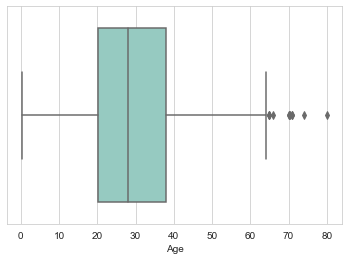

In [93]:
#analysing the age column:in order fill the null values in the age column we should check the outleirs.
sns.boxplot(x='Age', data=df , palette="Set3")

<b>Insights</b>:
   - Minimum age value : 0 (because of the null values)
    - Maximum age: around 80
    - median: around 25 to 30
    - and there are few outliers in the column.

In [94]:
#check the outliers
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [95]:
#CALCULATING THE IQR RANGE.
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
print('Q1=', Q1, 'Q3=', Q3)
IQR =Q3 -Q1
print('Iqr =', IQR)


Q1= 20.125 Q3= 38.0
Iqr = 17.875


In [96]:
#lower and upper limit
low_lim = Q1  - 1.5*IQR
up_lim = Q3 + 1.5*IQR
low_lim , up_lim

(-6.6875, 64.8125)

In [97]:
#the following code shows the value of age columns which lie beyond the IQR range.
df[(df.Age<low_lim)|(df.Age>up_lim)]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,7.7500,Q
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,26.5500,S
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,S
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,10.5000,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,71.0000,S


<b> Note;</b> Here we are dealing with the age coulmn that is a realisitc data values and not error data. So removing these 
data values is not the right options. so we will fill the null values with the median of the data.

In [98]:
#as there are outliers in the dataset we will try to fill the null values with median.\
df["Age"].fillna(df.Age.median()[0], inplace = True)

TypeError: 'float' object is not subscriptable

In [99]:
#the given datatype of the age is float so we have to covert into int.
a= df.Age.mean()
b= df.Age.median()
a,b


(29.69911764705882, 28.0)

In [100]:
#filling the outlier with the median value
df["Age"].fillna(28.0 , inplace = True)

<b> 2.4 Analysis of the test dataset</b>


<b> Note: In the test dataset we have 8.6% of null values in the age column and we will dorp the cabin column again.</b>

In [101]:
#Dropping the cabin column from test dataset.
sf.drop(['Cabin'] , axis=1 , inplace=True)

In [102]:
sf

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


<AxesSubplot:xlabel='Age'>

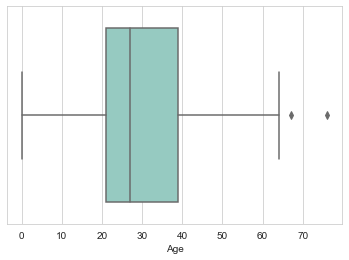

In [103]:
#analysing the age column:in order fill the null values in the age column we should check the outleirs.
sns.boxplot(x='Age', data=sf , palette="Set3")

In [104]:
#the given datatype of the age is float so we have to covert into int yet we can directly calculate the mean and median.

a= sf.Age.mean()
b= sf.Age.median()
a,b


(30.272590361445783, 27.0)

In [105]:
#filling the outlier with the median value
sf["Age"].fillna(28.0 , inplace = True)

<b>3. Dataset Visualization</b>

<b>3.1 Univariate Analysis in Train dataset.</b>

<b> Insigts to work on </b>
- 1.Check the distribution of age variable.
- 2. Realate Pclass, sex, age, Embarked, and Sibsp or Parch witht the target varibale of Survived.

Text(0.5, 1.0, 'Histogram for Age distribution')

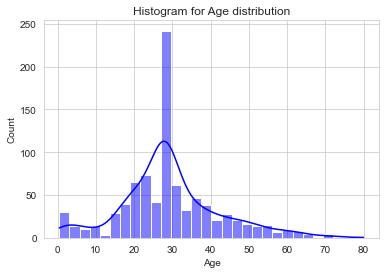

In [107]:
#create a distribution plot for the age column.
plot = sns.histplot(df.Age , kde=True, color='b')
plt.title('Histogram for Age distribution')

In [108]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CLASS OF PASSENGERS')

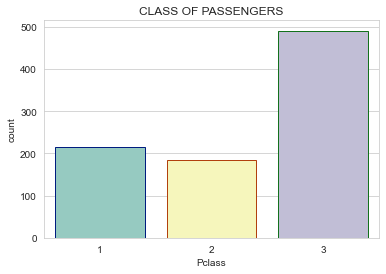

In [109]:
#Pclass visualization
sns.set_style('whitegrid')
sns.countplot(df['Pclass'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('CLASS OF PASSENGERS')


<b>Insight</b>:
- The number of passengers in the 3rd class was more than class 1 and class 2.

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-110-ed17a24610c2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


[Text(0, 0.0, '0.00%'),
 Text(0, 100.0, '100.00%'),
 Text(0, 200.0, '200.00%'),
 Text(0, 300.0, '300.00%'),
 Text(0, 400.0, '400.00%'),
 Text(0, 500.0, '500.00%'),
 Text(0, 600.0, '600.00%')]

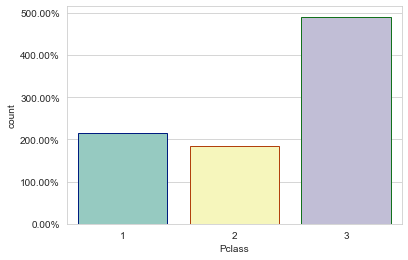

In [110]:
#visaulize in percentage

ax= sns.countplot(df['Pclass'], palette='Set3' , edgecolor=sns.color_palette("dark", 3), )
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

<b>Insight;</b>
- Class3 had 300% more (approx) passengers than class1(approx 200%) and class2 with less than 180%.

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender OF PASSENGERS')

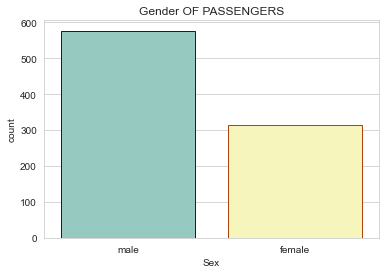

In [111]:
#Pclass visualization
sns.set_style('whitegrid')
sns.countplot(df['Sex'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Gender OF PASSENGERS')

In [112]:
print('total male and female passsengers;', df.Sex.value_counts())
print('Percentage of male passengers;', round((577/891)*100,2) , '%.')
print('Percentage of female passengers;', round((314/891)*100,2) , '%.')

total male and female passsengers; male      577
female    314
Name: Sex, dtype: int64
Percentage of male passengers; 64.76 %.
Percentage of female passengers; 35.24 %.


<b>Insight</b>;
- There were 29.52 % more male passengers on board.

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-113-0d45bf00dc50>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  xd.set_yticklabels(y_value)


[Text(0, 0.0, '0.00%'),
 Text(0, 100.0, '100.00%'),
 Text(0, 200.0, '200.00%'),
 Text(0, 300.0, '300.00%'),
 Text(0, 400.0, '400.00%'),
 Text(0, 500.0, '500.00%'),
 Text(0, 600.0, '600.00%'),
 Text(0, 700.0, '700.00%')]

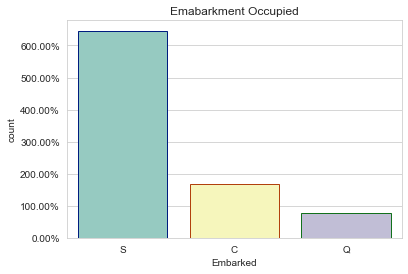

In [113]:
#Embarked visualization
sns.set_style('whitegrid')
xd = sns.countplot(df['Embarked'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Emabarkment Occupied')
y_value=['{:,.2f}'.format(x) + '%' for x in xd.get_yticks()]
xd.set_yticklabels(y_value)

<b>Insights:</b> 
   - S embarkment had more number of passengers than embarkment C and Q.

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Siblings or Spouse Counts')

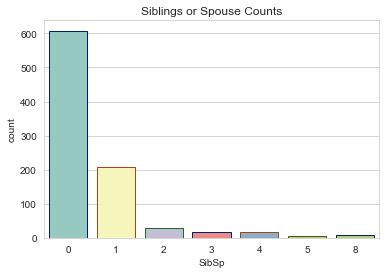

In [114]:
sns.set_style('whitegrid')
xd = sns.countplot(df['SibSp'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Siblings or Spouse Counts')

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CLASS OF PASSENGERS')

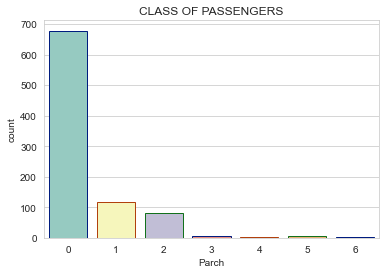

In [115]:
sns.set_style('whitegrid')
sns.countplot(df['Parch'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('CLASS OF PASSENGERS')

In [120]:
#coverted the age values into bins and grouped them into catgeorical value
bins =[0,18,30,45,60,90]
labels=['Child','Adults','Middle age adults','Older adults','Elders']
df['Age_cat']=pd.cut(df['Age'], bins=bins, labels=labels) #created a new column containig the age categorical variable.
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adults
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Middle age adults
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adults
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Middle age adults
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Middle age adults
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Adults
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Adults
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,Adults
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Adults


Text(0.5, 1.0, 'Age groups of the passengers')

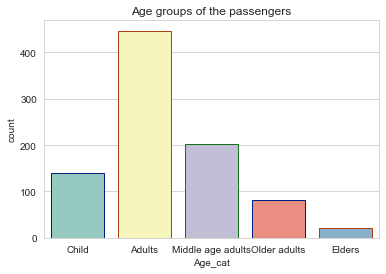

In [123]:
#visualize the age-cat
sns.set_style('whitegrid')
xz= sns.countplot(df['Age_cat'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Age groups of the passengers')


In [124]:
df.Age_cat.value_counts()

Adults               447
Middle age adults    202
Child                139
Older adults          81
Elders                22
Name: Age_cat, dtype: int64

<b>Insight;</b>
- Most of the passengers onboard were adults and very few of them were elders.

<b>3.2 Univeraite analysis with target variable of survived on the train dataset.</b>

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


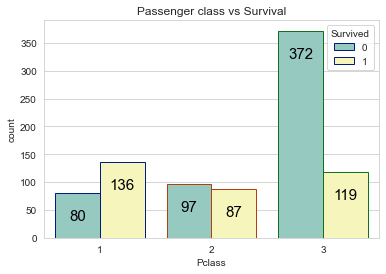

In [163]:
#Visualizing the passenger class with the survived.
sns.set_style('whitegrid')
ax = sns.countplot(df['Pclass'], palette='Set3' , hue=df.Survived, edgecolor=sns.color_palette("dark", 3))
plt.title('Passenger class vs Survival')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=15)



<b>Insight</b>:
 - The survival rate of Pclass 3 is less than class 1 and class2.
 - The survival rate of Pclass 2 is almost equal.
 - Though Pclass 1 had a positive survival rate than other two classes.

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


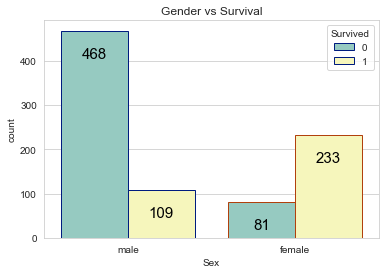

In [132]:
#Visualizing the gender with the survived.
sns.set_style('whitegrid')
ax = sns.countplot(df['Sex'], palette='Set3' , hue=df.Survived, edgecolor=sns.color_palette("dark", 3))
plt.title('Gender vs Survival')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=15)


<b>Insights:</b>
  - The number of male passengers was more than the female passengers.
  - But, the positive survival rate of females is greater than male.

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


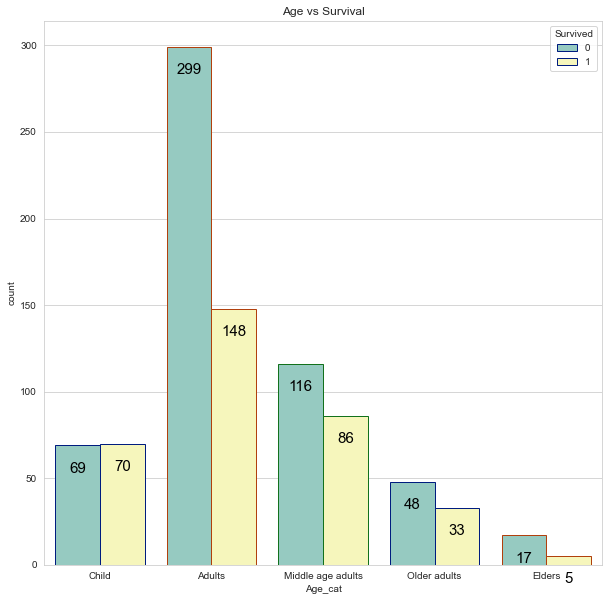

In [136]:
#Visualizing the gender with the survived.
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
ax = sns.countplot(df['Age_cat'], palette='Set3' , hue=df.Survived, edgecolor=sns.color_palette("dark", 3))
plt.title('Age vs Survival')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=15)

<b> Insights</b>:
- The adult group shows a large negative survival rate than any other age groups.
- The child group shows a balanced survival rate.

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


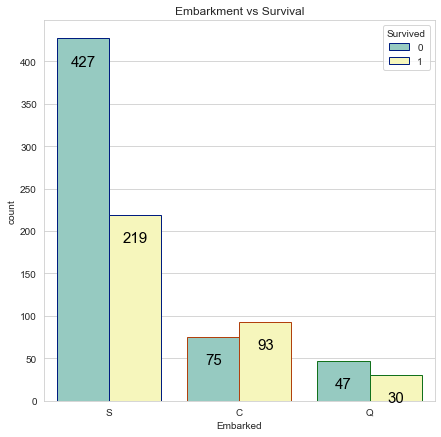

In [138]:
#Visualizing the gender with the survived.
sns.set_style('whitegrid')
plt.figure(figsize=(7,7))
ax = sns.countplot(df['Embarked'], palette='Set3' , hue=df.Survived, edgecolor=sns.color_palette("dark", 3))
plt.title('Embarkment vs Survival')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=15)

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


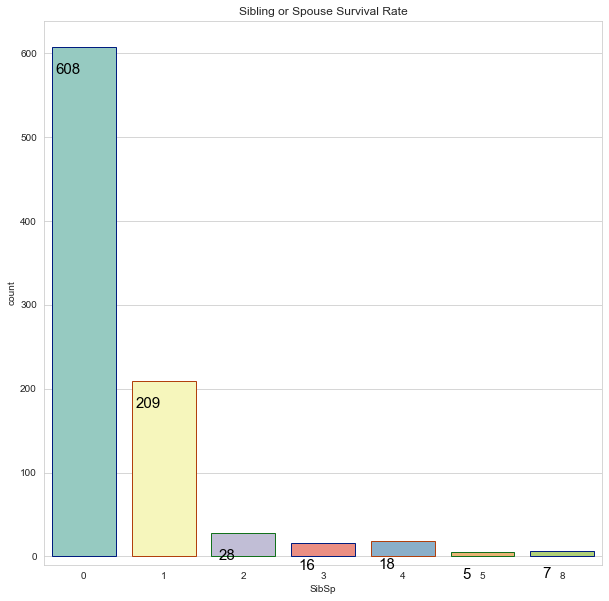

In [160]:
#Visualizing the SibSp variable
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
ax = sns.countplot(df['SibSp'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.ylim(-10,)
plt.title('Sibling or Spouse Survival Rate')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=15)

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


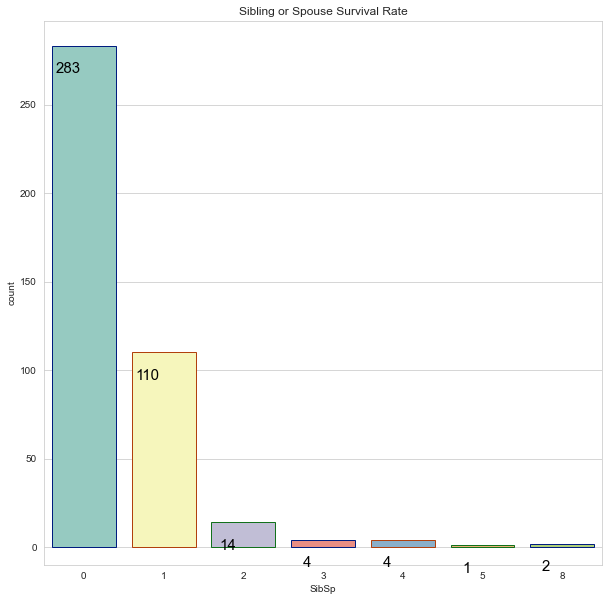

In [161]:
#Visualizing the SibSp variable
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
ax = sns.countplot(sf['SibSp'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.ylim(-10,)
plt.title('Sibling or Spouse Survival Rate')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=15)

<b>Insight:</b>
- The survival rate was far less for the pasengers embarked from S.


*In order to do we have only two numerical columns Age and Pclass.
So we can create dummy variables in order to realte them.*

In [149]:
#create dummy variables for sex and embarked to relate them.
df_new= pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)
#let us drop few categorical columns
df_new.drop(['Name','Age_cat'] , axis=1 , inplace=True)
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


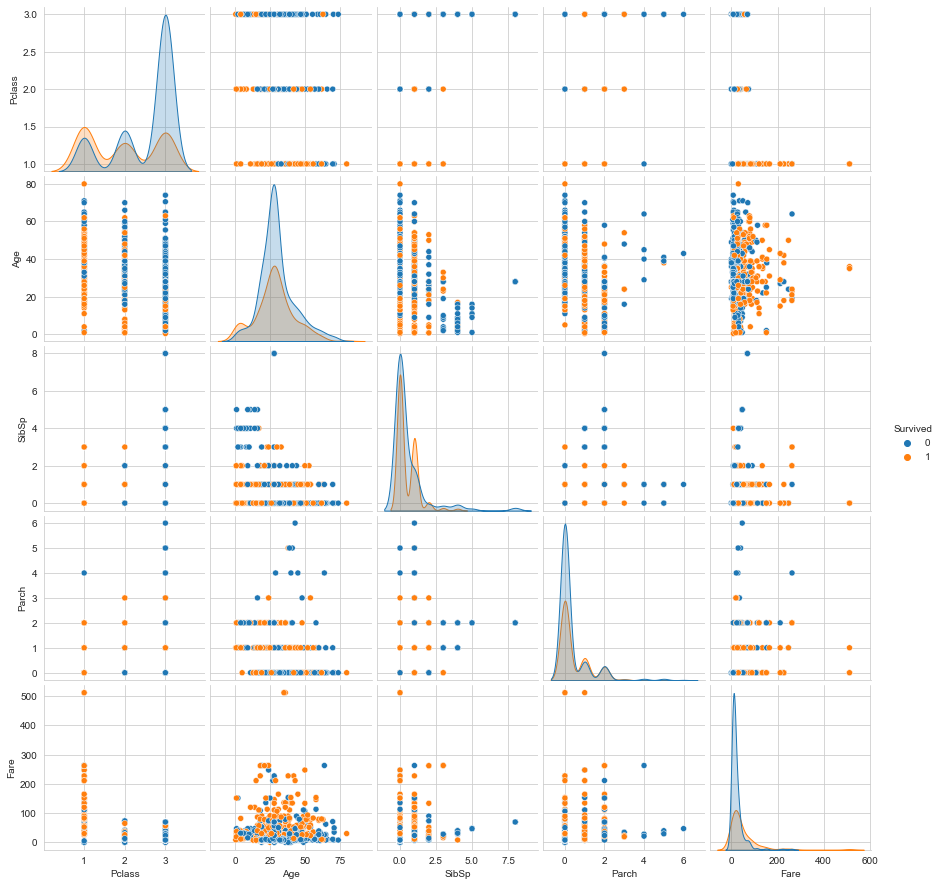

In [150]:
ax= sns.pairplot(df, hue='Survived')
ax

In [ ]:
<b>Insights gathered from the train dataset</b>:
    

<b>3.3 Univariate analysis of the test dataset </b>

<b> Insigts to work on </b>
- 1.Check the distribution of age variable.
2. Realate Pclass, sex, age, Embarked, and Sibsp or Parch witht the target varibale of Survived.

Text(0.5, 1.0, 'Histogram for Age distribution')

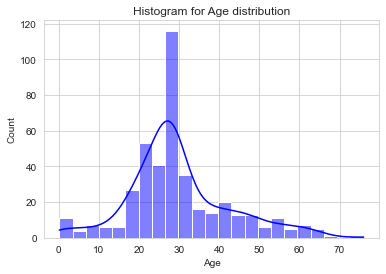

In [45]:
#create a distribution plot for the age column.
plot = sns.histplot(sf.Age , kde=True, color='b')
plt.title('Histogram for Age distribution')

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CLASS OF PASSENGERS')

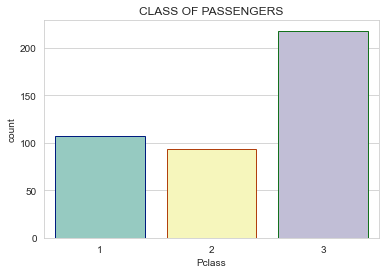

In [46]:
#Pclass visualization
sns.set_style('whitegrid')
sns.countplot(sf['Pclass'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('CLASS OF PASSENGERS')

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender OF PASSENGERS')

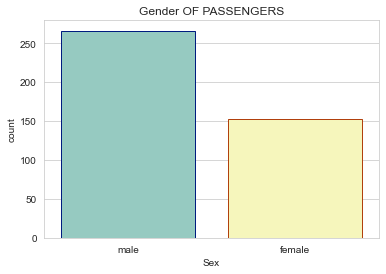

In [47]:
#Pclass visualization
sns.set_style('whitegrid')
sns.countplot(sf['Sex'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Gender OF PASSENGERS')

In [48]:
print('total male and female passsengers;', sf.Sex.value_counts())
print('Percentage of male passengers;', round((266/891)*100,2) , '%.')
print('Percentage of female passengers;', round((152/891)*100,2) , '%.')

total male and female passsengers; male      266
female    152
Name: Sex, dtype: int64
Percentage of male passengers; 29.85 %.
Percentage of female passengers; 17.06 %.


In [49]:
sf.Sex.isnull().sum()

0

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-50-ac367f8bc512>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  xd.set_yticklabels(y_value)


[Text(0, 0.0, '0.00%'),
 Text(0, 50.0, '50.00%'),
 Text(0, 100.0, '100.00%'),
 Text(0, 150.0, '150.00%'),
 Text(0, 200.0, '200.00%'),
 Text(0, 250.0, '250.00%'),
 Text(0, 300.0, '300.00%')]

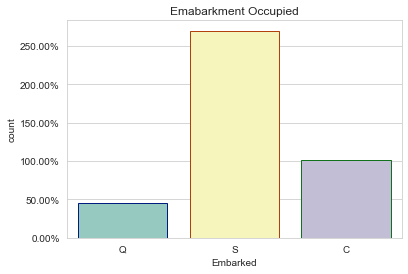

In [50]:
#Embarked visualization
sns.set_style('whitegrid')
xd = sns.countplot(sf['Embarked'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Emabarkment Occupied')
y_value=['{:,.2f}'.format(x) + '%' for x in xd.get_yticks()]
xd.set_yticklabels(y_value)

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Siblings or Spouse Counts')

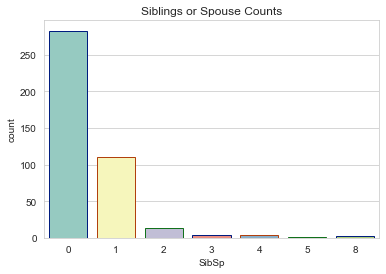

In [51]:
sns.set_style('whitegrid')
xd = sns.countplot(sf['SibSp'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Siblings or Spouse Counts')

C:\Users\vshra_olk4b\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CLASS OF PASSENGERS')

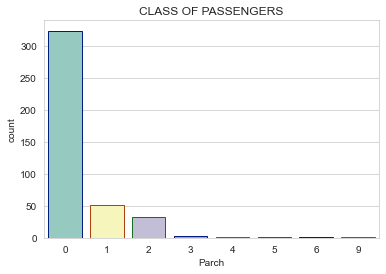

In [52]:
sns.set_style('whitegrid')
sns.countplot(sf['Parch'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('CLASS OF PASSENGERS')

In [125]:
#coverted the age values into bins and grouped them into catgeorical value
bins =[0,18,30,45,60,90]
labels=['Child','Adults','Middle age adults','Older adults','Elders']
sf['Age_cat']=pd.cut(sf['Age'], bins=bins, labels=labels) #created a new column containig the age categorical variable.
sf

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Middle age adults
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Older adults
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Elders
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Adults
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Adults
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,28.0,0,0,8.0500,S,Adults
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Middle age adults
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Middle age adults
416,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,S,Adults


Text(0.5, 1.0, 'Age groups of the passengers')

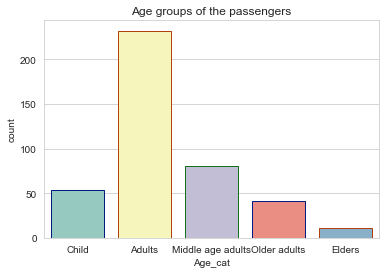

In [127]:
#visualize the age-cat
sns.set_style('whitegrid')
xz= sns.countplot(sf['Age_cat'], palette='Set3' , edgecolor=sns.color_palette("dark", 3))
plt.title('Age groups of the passengers')